# US Librarian Data Plot in Matplotlib

This file visualizes the number of librarians in major US cities across 50 states in Matplotlib. The comes from FiveThirtyEight and I have added longitude and latitude data. I have not added a background image of USA. This process can be easily replicated in Bokeh in tadem with Google Maps but you will need to use an API.

Some relevant numerical features include:
- tot_emp: This is the total number of employess in a city or group of cities
- jobs_1000: This is the the number of librarians per 1000 people in the area


In [1]:
import pandas as pd
import numpy as np

df1 = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/librarians/librarians-by-msa.csv")

In [2]:
df1.head()

,prim_state,area_name,tot_emp,emp_prse,jobs_1000,loc_quotient
0,OH,"Springfield, OH",**,**,**,**
1,WA,"Mount Vernon-Anacortes, WA",**,**,**,**
2,PR,"Aguadilla-Isabela-San Sebastian, PR",160,4.4,3.727,3.62
3,PR,"Ponce, PR",180,3.6,3.434,3.34
4,PR,"San German-Cabo Rojo, PR",50,0.2,2.679,2.6


In [3]:
df2 = pd.read_csv("uscities.csv")

In [4]:
df2.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,county_fips_all,county_name_all,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,South Creek,South Creek,WA,Washington,53053,Pierce,53053,Pierce,46.9994,-122.3921,2500.0,125.0,polygon,False,True,America/Los_Angeles,3,98580 98387 98338,1840042075
1,Roslyn,Roslyn,WA,Washington,53037,Kittitas,53037,Kittitas,47.2507,-121.0989,947.0,84.0,polygon,False,True,America/Los_Angeles,3,98941 98068 98925,1840019842
2,Sprague,Sprague,WA,Washington,53043,Lincoln,53043,Lincoln,47.3048,-117.9713,441.0,163.0,polygon,False,True,America/Los_Angeles,3,99032,1840021107
3,Gig Harbor,Gig Harbor,WA,Washington,53053,Pierce,53053,Pierce,47.3352,-122.5968,9507.0,622.0,polygon,False,True,America/Los_Angeles,3,98332 98335,1840019855
4,Lake Cassidy,Lake Cassidy,WA,Washington,53061,Snohomish,53061,Snohomish,48.0639,-122.0920,3591.0,131.0,polygon,False,True,America/Los_Angeles,3,98223 98258 98270,1840041959


## Cleaning and Merging
The data from FiveThirtyEight has some cities coupled together in the column ```area_name```. The front city usually being the major city. Since we are not concerned with exact precision of marker location and have no way of dividing employee data for each city, we will extract only the first city if cities are coupled.

We first remove the State name from the string and then extract the first city.

In [5]:
#We clean the area_name due to the fact that it is coupled with a state name and links mutiple cities together
def citynameextract(item):
    split = item.split(",")
    return split[0]
df1.area_name = df1.area_name.apply(citynameextract)

def citynameextract2(item):
    split = item.split("-")
    return split[0]
df1.area_name = df1.area_name.apply(citynameextract2)


In [6]:
df1.head()

,prim_state,area_name,tot_emp,emp_prse,jobs_1000,loc_quotient
0,OH,Springfield,**,**,**,**
1,WA,Mount Vernon,**,**,**,**
2,PR,Aguadilla,160,4.4,3.727,3.62
3,PR,Ponce,180,3.6,3.434,3.34
4,PR,San German,50,0.2,2.679,2.6


In [7]:
#dropping the two areas that have no data. The two rows are the only ones missing data. We reset the index as well
df1 = df1.drop([0,1]).reset_index()

In [8]:
df1 = df1.drop('index', axis = 1)
df1 = df1.rename(columns = {"prim_state":"state_id", "area_name":"city_ascii"})
df1.head()


,state_id,city_ascii,tot_emp,emp_prse,jobs_1000,loc_quotient
0,PR,Aguadilla,160,4.4,3.727,3.62
1,PR,Ponce,180,3.6,3.434,3.34
2,PR,San German,50,0.2,2.679,2.6
3,PR,Mayaguez,80,1.4,2.563,2.49
4,KY,Owensboro,100,34,2.099,2.04


In [9]:
#we left join latitude, longtitude data from dataframe 2
#We tried to merge on city but found that some elements were spelled in non English
df1 = df1.merge(df2[['state_id', 'city_ascii','lat', 'lng']], how = 'left', on = ['state_id', 'city_ascii'])

In [10]:
#matplotlib threw some errors while plotting the color map. As suspected, numerical variables are not int or float
df1.dtypes

state_id         object
city_ascii       object
tot_emp          object
emp_prse         object
jobs_1000        object
loc_quotient     object
lat             float64
lng             float64
dtype: object

In [11]:
#Change values to numerical data
columns = ['tot_emp', 'emp_prse', 'jobs_1000', 'loc_quotient']
df1[columns] =  df1[columns].apply(pd.to_numeric)
df1.dtypes

state_id         object
city_ascii       object
tot_emp           int64
emp_prse        float64
jobs_1000       float64
loc_quotient    float64
lat             float64
lng             float64
dtype: object

## Plotting
Here I have ```%matplotlib notebook``` instead of ```%matplotlib inline``` to allow interaction with the image.

<IPython.core.display.Javascript object>


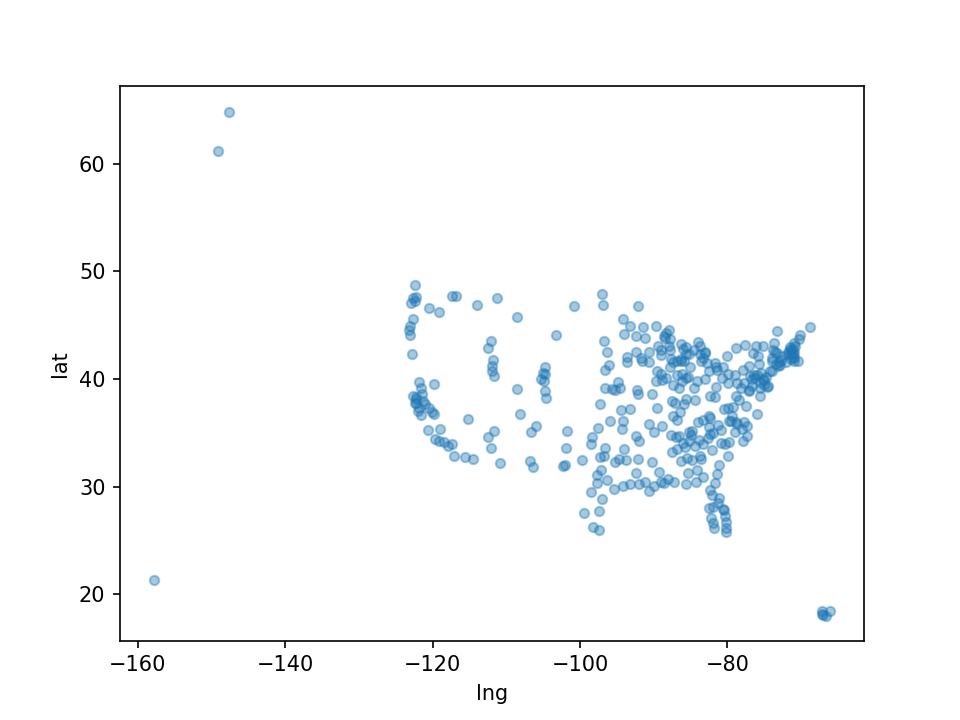

In [12]:
import matplotlib.pyplot as plt
%matplotlib notebook
df1.plot(kind="scatter", x="lng", y="lat", alpha=0.4)
plt.show()


<IPython.core.display.Javascript object>


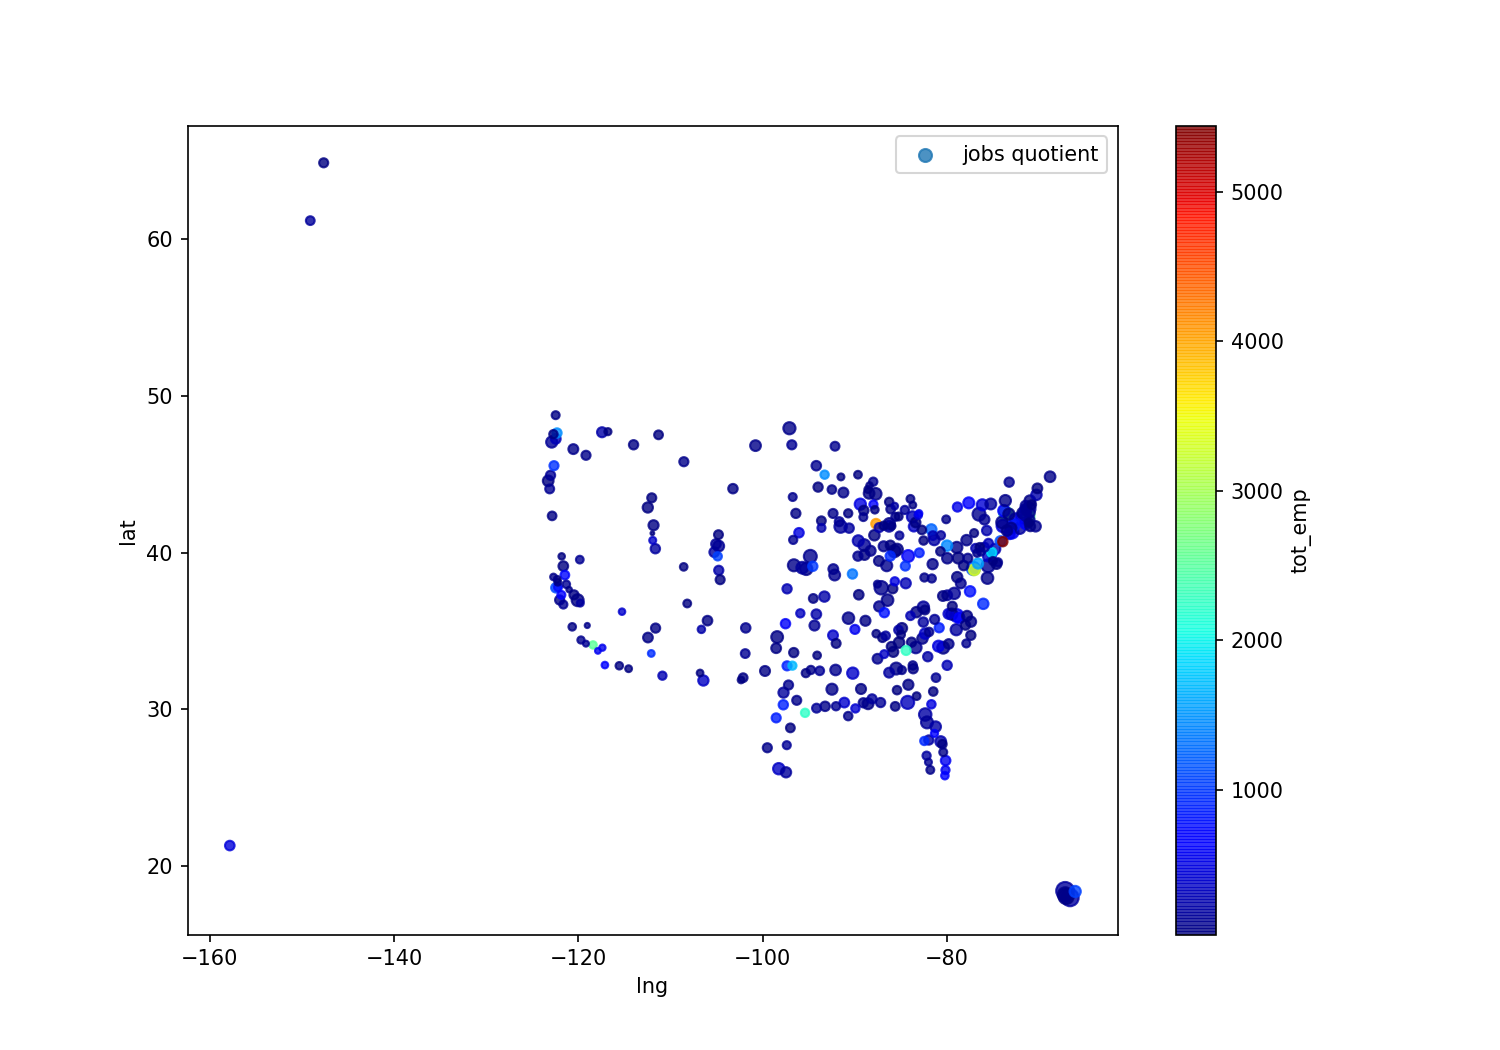

In [13]:
df1.plot(kind="scatter", x="lng", y="lat",
        s=df1['jobs_1000']*20, label="jobs quotient",
        c="tot_emp", cmap=plt.get_cmap("jet"),
        colorbar=True, alpha=0.8, 
        figsize=(10,7))

plt.legend()
plt.show()

In [14]:
df1= df1.dropna()

In [15]:
import folium
from IPython.display import display


In [17]:
# Make an empty map
m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)

for i in range(0,len(df1)):
   folium.Circle(
      location=[df1.iloc[i]['lat'], df1.iloc[i]['lng']],
      popup=df1.iloc[i]['city_ascii'],
      radius=df1.iloc[i]['jobs_1000']*20000,
      color= 'crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)

display(m)

m.save('map.html')
#You will need manually access the following html to view the map


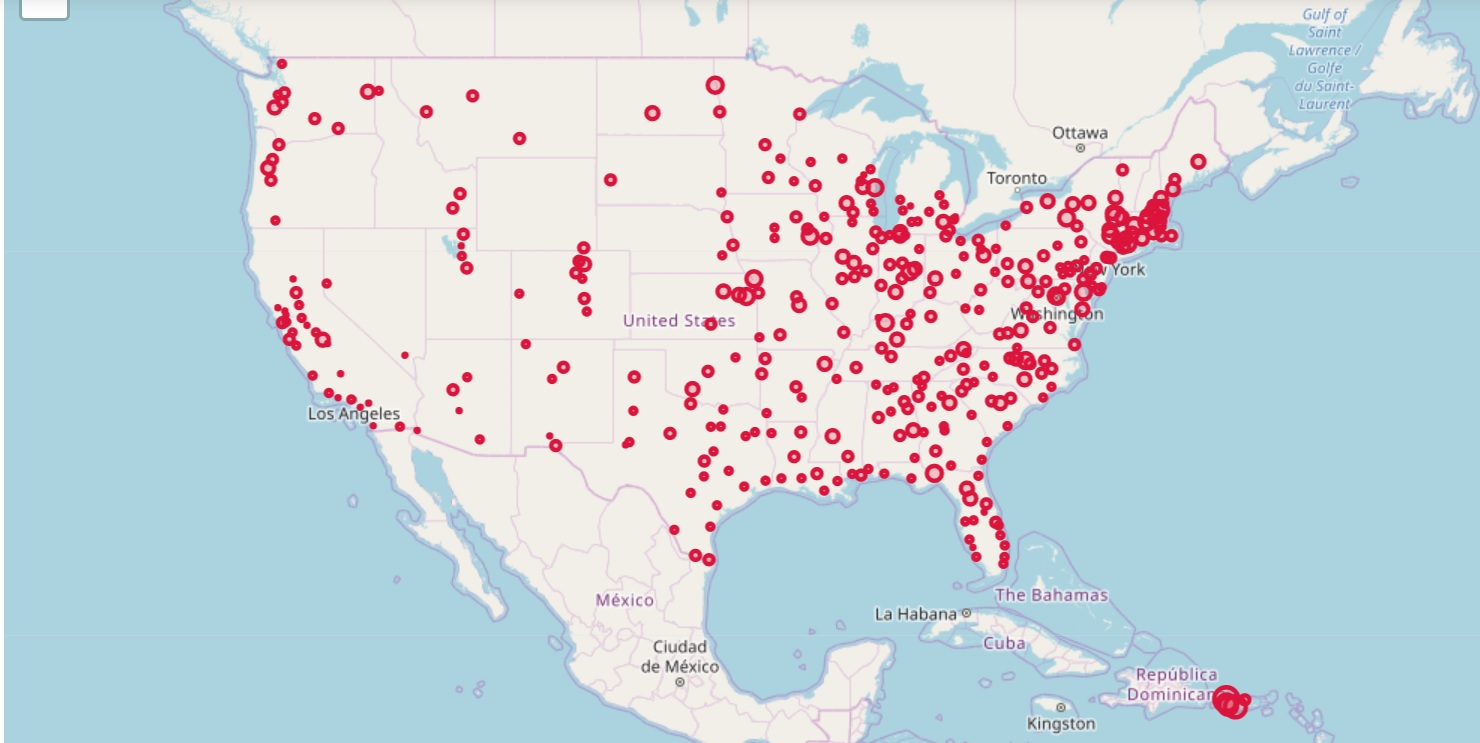

In [2]:
#Screenshot
from IPython.display import Image
Image(filename='Map.jpg') 

# Sources
Librarian Data from FiveThirtyEight:
https://raw.githubusercontent.com/fivethirtyeight/data/master/librarians/librarians-by-msa.csv

Longitude, latitude Data from simplemaps:
https://simplemaps.com/data/us-cities

Mapping Tutorial:
https://www.bigendiandata.com/2017-06-27-Mapping_in_Jupyter/